
<br>
CIFAR-10  DATASET CONVOLUTION NEURAL NETWORK - CNN<br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(50000, 1)



 <br>
 X_TRAIN DATA :<br>
 <br>
(50000, 32, 32, 3) - ><br>
50000- samples<br>
32- height <br>
32 - width <br>
3-colour channels - RGB<br>


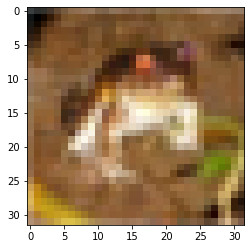

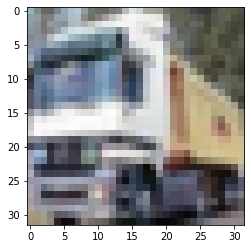

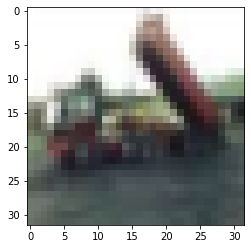

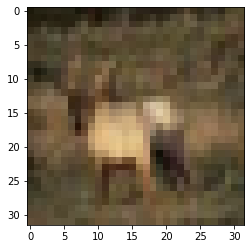

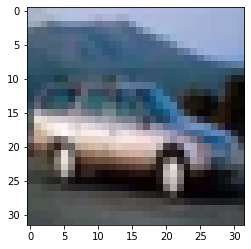

In [5]:
for x in range(0,5):
    plt.imshow(x_train[x])
    plt.show()


 <br>
Understanding the original labels:<br>
The label data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.<br>
airplane : 0<br>
automobile : 1<br>
bird : 2<br>
cat : 3<br>
deer : 4<br>
dog : 5<br>
frog : 6<br>
horse : 7<br>
ship : 8<br>
truck : 9<br>


In [6]:
def get_label_from_test(y_test):
    for i in (y_test):
        if i == 0:
            valt='Airplane'
        elif i == 1:
            valt='Automobile'
        elif i == 2:
            valt='Bird'
        elif i == 3:
            valt='Cat'
        elif i == 4:
            valt='Deer'
        elif i == 5:
            valt='Dog'
        elif i == 6:
            valt='Frog'
        elif i == 7:
            valt='House'
        elif i == 8:
            valt='Ship'
        else:
            valt='Truck'
    return str(valt)

In [7]:
def get_label_from_train(y_train):
    for i in (y_train):
        if i == 0:
            valt = 'Airplane'
        elif i == 1:
            valt = 'Automobile'
        elif i == 2:
            valt = 'Bird'
        elif i == 3:
            valt = 'Cat'
        elif i == 4:
            valt = 'Deer'
        elif i == 5:
            valt = 'Dog'
        elif i == 6:
            valt = 'Frog'
        elif i == 7:
            valt = 'House'
        elif i == 8:
            valt = 'Ship'
        else:
            valt = 'Truck'
    return str(valt)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-71a55246c8b5>, line 25)

In [8]:
""" 
PRE-PROCESSING DATA :
Scaling Of Data :
"""

' \nPRE-PROCESSING DATA :\nScaling Of Data :\n'

In [9]:
print(x_train.max())

255


In [10]:
x_train=x_train/255

In [11]:
x_test=x_test/255

In [12]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]



 <br>
These are not continuous labels, these are categorical labels , based on photos<br>
Lets us convert them to binary set of integers using to categorical for multi class classification :<br>


In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train=to_categorical(y_train,10)

In [15]:
y_cat_test=to_categorical(y_test,10)


 <br>
Building A CNN Model :<br>
In CONV . LAYER -> Input Shape : input_shape=(32,32,3) from x_train shape<br>
Also , since 32*32*3 is 3072 , hence , we have  larger number of parameters, there fore , i <br>
am gonna create 2 layers of convolutional , followed by pooling layers..<br>
since our data is complex , i am adding a layer of dense layer of 256 neurons as well..before final output<br>
node layer..<br>


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [17]:
model=Sequential()

ONVOLUTIONAL LAYER :

In [18]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

OOLING LAYERS :

In [19]:
model.add(MaxPool2D(pool_size=(2,2)))

ONVOLUTIONAL LAYER :

In [20]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

OOLING LAYERS :

In [21]:
model.add(MaxPool2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))

UTPUT LAYER :

In [23]:
model.add(Dense(10,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_Stop=EarlyStopping(monitor='val_loss',patience=2)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_Stop])

Epoch 1/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5031 - accuracy: 0.4526 - val_loss: 1.2888 - val_accuracy: 0.5343
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1919 - accuracy: 0.5784 - val_loss: 1.1193 - val_accuracy: 0.6105
Epoch 3/15
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0442 - accuracy: 0.6316 - val_loss: 1.0948 - val_accuracy: 0.6177
Epoch 4/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9401 - accuracy: 0.6695 - val_loss: 1.0510 - val_accuracy: 0.6385
Epoch 5/15
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8510 - accuracy: 0.7025 - val_loss: 1.0081 - val_accuracy: 0.6516
Epoch 6/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7750 - accuracy: 0.7290 - val_loss: 0.9535 - val_accuracy: 0.6817
Epoch 7/15
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7111 - accuracy: 0.7511 - val_loss: 0.9752 -

In [28]:
metrics=pd.DataFrame(model.history.history)
print(metrics)

       loss  accuracy  val_loss  val_accuracy
0  1.503134   0.45258  1.288841        0.5343
1  1.191922   0.57844  1.119291        0.6105
2  1.044246   0.63162  1.094790        0.6177
3  0.940121   0.66948  1.051035        0.6385
4  0.850990   0.70248  1.008125        0.6516
5  0.775050   0.72896  0.953525        0.6817
6  0.711063   0.75110  0.975179        0.6753
7  0.646014   0.77292  0.972160        0.6838


In [29]:
print(metrics.columns)

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')


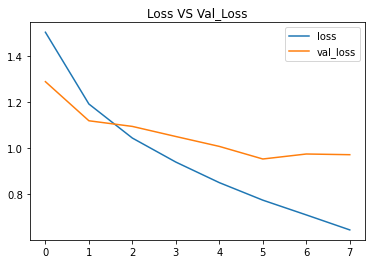

In [30]:
metrics[['loss','val_loss']].plot()
plt.title('Loss VS Val_Loss')
plt.show()

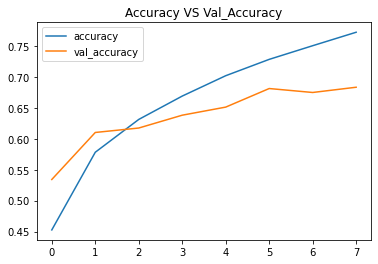

In [31]:
metrics[['accuracy','val_accuracy']].plot()
plt.title('Accuracy VS Val_Accuracy')
plt.show()

In [32]:
eval=model.evaluate(x_test,y_cat_test)
print("Loss and accuracy of model respectively are : ",eval)

313/313 [==============================] - 2s 6ms/step - loss: 0.9722 - accuracy: 0.6838
Loss and accuracy of model respectively are :  [0.9721603393554688, 0.6837999820709229]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1000
           1       0.76      0.82      0.79      1000
           2       0.61      0.53      0.57      1000
           3       0.55      0.48      0.51      1000
           4       0.63      0.67      0.65      1000
           5       0.61      0.55      0.58      1000
           6       0.71      0.80      0.76      1000
           7       0.77      0.69      0.73      1000
           8       0.69      0.85      0.76      1000
           9       0.80      0.72      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



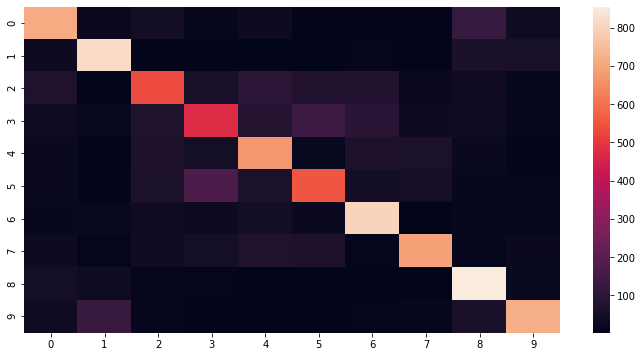

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

Comparison Dataframe :

In [37]:
comp_df = pd.DataFrame({'Actual Label': y_test.reshape(10000, ), 'Predicted Label': predictions})
print(comp_df.head(10))
l1 = []

   Actual Label  Predicted Label
0             3                3
1             8                8
2             8                8
3             0                0
4             6                4
5             6                6
6             1                1
7             6                6
8             3                3
9             1                1


In [38]:
for i in predictions:
    if i == 0:
        l1.append('Airplane')
    elif i == 1:
        l1.append('Automobile')
    elif i == 2:
        l1.append('Bird')
    elif i == 3:
        l1.append('Cat')
    elif i == 4:
        l1.append('Deer')
    elif i == 5:
        l1.append('Dog')
    elif i == 6:
        l1.append('Frog')
    elif i == 7:
        l1.append('House')
    elif i == 8:
        l1.append('Ship')
    else:
        l1.append('Truck')

In [39]:
comp_df['Predicted Label Name'] = l1
print(comp_df.head(20))

    Actual Label  Predicted Label Predicted Label Name
0              3                3                  Cat
1              8                8                 Ship
2              8                8                 Ship
3              0                0             Airplane
4              6                4                 Deer
5              6                6                 Frog
6              1                1           Automobile
7              6                6                 Frog
8              3                3                  Cat
9              1                1           Automobile
10             0                0             Airplane
11             9                9                Truck
12             5                5                  Dog
13             7                7                House
14             9                9                Truck
15             8                8                 Ship
16             5                5                  Dog
17        


 <br>
Prediction ON Random Data :<br>


In [40]:
sampl_img=x_test[16]

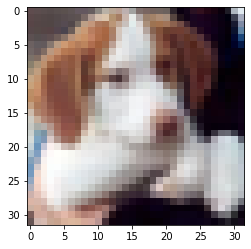

In [41]:
plt.imshow(sampl_img)
plt.show()

In [42]:
print('True Label Is :', y_test[16])

True Label Is : [5]


In [43]:
pred2=model.predict_classes(sampl_img.reshape(1,32,32,3))

In [44]:
print('Predicted Label IS : ',pred2)

Predicted Label IS :  [5]


In [45]:
print("The predicted label is : ",get_label_from_test(pred2))
print("The actual label is : ", get_label_from_test(y_test[16]))

The predicted label is :  Dog
The actual label is :  Dog
